In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

> In  this  assignment, you  will  need  to  apply  data  analytics,  using  the  tools  introduced  during the labs.You are required to study the SEEK job market dataand analyze. The assignment consists  of  3  parts. In  the  first  part, you  will  need  to understand  data  characteristicsusing data preparation and preprocessing techniques.In the second part, you will perform various data  analysis  techniques,  including  exploratory,  statistical,  and  predictiveones.In  the  third part,you will need to evaluate your findings and determine appropriate future actions.

# Part 1 – Data Preparation and Preprocessing [8 points]
> * The  primary  dataset  that  we  would  like  to  use  is  the job  market  dataset  which  is provided in CSV format (data.csv).
> * Perform data preparation and preprocessing for your analysis

In [0]:
df = pd.read_csv("/content/drive/My Drive/ColabBDA/data.csv")
print(df.head())
print(df.shape)

         Id  ... JobType
0  37404348  ...     NaN
1  37404337  ...     NaN
2  37404356  ...     NaN
3  37404330  ...     NaN
4  37404308  ...     NaN

[5 rows x 13 columns]
(318477, 13)


/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (0,4,5,6,7) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


The data was provided in CSV format, so to load it into ``Pandas``, the in-built ``read_csv`` fuction will suffice. This will return a ``DataFrame``, which we will call ``df`` out of tradition.

This may be stating the obvious, but ``df.shape`` tells us how many rows and columns there are. In this case, it is telling us that there are 13 attributes for 318477 listings.

In [0]:
print(df.info())
# some of these should be special types
def strip_amp(x):
  x = str(x)
  try:
    i = x.index("&")
  except ValueError:
    return x
  return x[0:i]
df.Id = df.Id.apply(strip_amp)

df["Id"] = pd.to_numeric(df["Id"])
df["Date"] = pd.to_datetime(df["Date"])
# check types again
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 318477 entries, 0 to 318476
Data columns (total 13 columns):
Id                   318477 non-null object
Title                318477 non-null object
Company              306473 non-null object
Date                 318477 non-null object
Location             197229 non-null object
Area                 122658 non-null object
Classification       197229 non-null object
SubClassification    197229 non-null object
Requirement          318470 non-null object
FullDescription      302302 non-null object
LowestSalary         318477 non-null int64
HighestSalary        318477 non-null int64
JobType              302379 non-null object
dtypes: int64(2), object(11)
memory usage: 31.6+ MB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 318477 entries, 0 to 318476
Data columns (total 13 columns):
Id                   318477 non-null int64
Title                318477 non-null object
Company              306473 non-null object
Date                

The ``Id`` column seems to have been extracted from the URL, but some Media Queries were left in the data. However, in attempting to convert column Id to numeric, I came across this error:

    ValueError: Unable to parse string "37915260&searchrequesttoken=e859cc74-e22f-498d-ac7c-77a7e1b45676" at position 153767

This signaled me that I needed to sanitize the input. That is, if an ``&`` is present, use the substring up to but not including that point.
I had to strip the media queries out, in order to reduce unexpected data types, though I suppose it doesn't matter too much while analyzing the data.

I also converted the ``Date`` column to the inbuilt ``datetime`` type for Pandas.

In [0]:
print("# Unique Title (first 8)")
print(df.Title.value_counts()[:8], "\n Count:", len(df.Title.unique()))
print("\n# Unique Company (first 8)")
print(df.Company.value_counts()[:8], "\n Count:", len(df.Company.unique()))
print("\n# Unique Location (last 8)")
print(df.Location.value_counts()[-8:], "\n Count:", len(df.Location.unique()))
print("\n# Unique Area (all)")
print(df.Area.value_counts(), "\n Count:", len(df.Area.unique()))
print("\n# Unique Classification (first 8)")
print(df.Classification.value_counts()[:8], "\n Count:", len(df.Classification.unique()))
print("\n# Unique SubClassification (first 8)")
print(df.SubClassification.value_counts()[:8], "\n Count:", len(df.SubClassification.unique()))
print("\n# Unique Requirement (last 8)") # Seems like free text
print(df.Requirement.value_counts()[-8:], "\n Count:", len(df.Requirement.unique()))
print("\n# Unique JobType (all)") # Seems like there is only 4 categories plus nan
print(df.JobType.value_counts(), "\n Count:", len(df.JobType.unique()))
print("\n")
print(1 - (len(df.Requirement.unique()) / df.shape[0]))

# Unique Title (first 8)
Project Manager                 1298
Business Analyst                 830
Business Development Manager     817
Administration Assistant         725
Executive Assistant              660
Receptionist                     609
Registered Nurse                 594
Customer Service Officer         517
Name: Title, dtype: int64 
 Count: 168065

# Unique Company (first 8)
Jora Local                                                                          9354
Hudson                                                                              1668
Design & Build                                                                      1547
Robert Walters                                                                      1385
Paxus                                                                               1325
Talent – Winner ‘Seek Large Recruitment Agency of the Year’ 3 consecutive years!    1280
Chandler Macleod Group                                                     

As a reminder, there are 318477 job listings. There are 40629 companies, which posted job offers in 65 locations (some of which did not list a location).

There were only 20 unique areas, and they seemed barely kind of familiar to me, so I thought they were all parts of only a few locations. I may further investigate this later.

Requirements seem to be just free text, and do not seem to give any quantifiable information, unless we are specifically looking for a keyword already. I think we can drop this column.

It is interesting that requirements are not unique, because from 318477 listings, there were only 234288 unique requirements. That means that 26.4% of all listings have the same requirements as another listing, possibly a parallel job listing from the same company in a different location (assuming they don't plagiarize each other).

In [0]:
df.drop("Requirement", axis=1)

,Id,Title,Company,Date,Location,Area,Classification,SubClassification,FullDescription,LowestSalary,HighestSalary,JobType
0,37404348,Casual Stock Replenisher,Aldi Stores,2018-10-07 00:00:00+00:00,Sydney,North West & Hills District,Retail & Consumer Products,Retail Assistants,NaN,0,30,NaN
1,37404337,Casual Stock Replenisher,Aldi Stores,2018-10-07 00:00:00+00:00,Richmond & Hawkesbury,NaN,Retail & Consumer Products,Retail Assistants,NaN,0,30,NaN
2,37404356,RETAIL SALES SUPERSTARS and STYLISTS Wanted - ...,LB Creative Pty Ltd,2018-10-07 00:00:00+00:00,Brisbane,CBD & Inner Suburbs,Retail & Consumer Products,Retail Assistants,NaN,0,30,NaN
3,37404330,Team member - Belrose,Anaconda Group Pty Ltd,2018-10-07 00:00:00+00:00,Gosford & Central Coast,NaN,Retail & Consumer Products,Retail Assistants,NaN,0,30,NaN
4,37404308,"Business Banking Contact Centre Specialist, Ni...",Commonwealth Bank - Business & Private Banking,2018-10-07 00:00:00+00:00,Sydney,Ryde & Macquarie Park,Call Centre & Customer Service,Sales - Inbound,NaN,0,30,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
318472,38564891,Program Manager - Trade Reporting,Talenza,2019-03-13 00:00:00+00:00,NaN,NaN,NaN,NaN,NaN,200,999,NaN
318473,38564940,Web Content Writer - June 2019 contract,Talent – Winner ‘Seek Large Recruitment Agency...,2019-03-13 00:00:00+00:00,NaN,NaN,NaN,NaN,NaN,200,999,NaN
318474,38552964,Brand Director - Global Premium Brand,Retail Career Consulting Pty Ltd,2019-03-12 00:00:00+00:00,NaN,NaN,NaN,NaN,NaN,200,999,NaN
318475,38534438,"Head of Financial Planning, Reporting & Strategy",Moir Group,2019-03-08 00:00:00+00:00,NaN,NaN,NaN,NaN,NaN,200,999,NaN


# Part 2 – Data Analysis and Interpretation [17 points]
* Perform exploratory data analysis
* Perform statisticaldata analysis
* Perform predictive data analysis
* Submit your Jupyter notebook in your Github repository

## 1) Study the job metadata. Extract the relevant information to describe the job’s attributes.
For example:
* What is the sector, sub-sector of each job?
* Where is the location of the job?
* Which is the range of salaries for each job?
-----
I will assume that this means that I will get a job listing's row as input and I need to provide the metadata.

In [0]:
def print_data(input_row):
  this_job = df.iloc[input_row]
  # print(df.iloc[input_row])
  print("Title:", this_job.Title)
  print("Sector:", this_job.Classification)
  print("Sub-sector:", this_job.SubClassification)
  print("Location:", this_job.Location, ("(" + str(this_job.Area) + ")") if this_job.Area else "")
  print("Salary range:", str(this_job.LowestSalary) + "~" + str(this_job.HighestSalary))

input_row = 286846
print_data(input_row)

Title: Domestic Family Violence Specialist Facilitator
Sector: nan
Sub-sector: nan
Location: nan (nan)
Salary range: 70~80


I coded the function and tested it on several different inputs. It revealed that sector, sub-sector, and location may be missing from the listing!

    > print_data(286846)
    Title: Domestic Family Violence Specialist Facilitator
    Sector: nan
    Sub-sector: nan
    Location: nan (nan)
    Salary range: 70~80

Are these valid listings? It could be that, according to the hosting site from which the data came, yes, they are. Or it could be that the data scraping has failed partially. I'll leave them in just in case.

## 2) Study the market by locations. For example:
* What is  the  market size in  each  city?
* Which  are  the  hottest  job  sectors  in each city?
* Which  range  of  salary  is  common  in  each  city?
* Where  are  the  employees more well-paid?
* Can  you  detect  the pattern  of  posting:  e.g.  are  more  jobs  posted  at  the beginning of month?

Market size per city:
Sydney                                  60765
Melbourne                               46690
Brisbane                                21466
Perth                                   13198
Adelaide                                 6653
                                        ...  
Yorke Peninsula & Clare Valley             96
Tumut, Snowy & Monaro                      86
Somerset & Lockyer                         65
Fleurieu Peninsula & Kangaroo Island       64
Central & South East TAS                   57
Name: Location, Length: 65, dtype: int64 
 Count: 66

Unique sectors per city:
Location                        Classification                      
ACT                             Accounting                              180
                                Administration & Office Support         319
                                Advertising, Arts & Media                22
                                Banking & Financial Services             47
                    

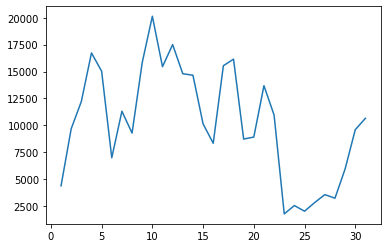

In [14]:
# market size per city
print("Market size per city:")
print(df.Location.value_counts(), "\n Count:", len(df.Location.unique()))

print("\nUnique sectors per city:")
print(df.groupby(['Location','Classification'])['Id'].count())

print("Day of the month to post")
plt.plot(df.Date.dt.day.value_counts().sort_index())

Unsurprisingly, most jobs are in well-known places.

I tried to analyze each location concurrently, but I have no idea how to do that, and my attempts resulted in this error:

    ValueError: 'Location' is both an index level and a column label, which is ambiguous.

After consulting some online documents, I managed to get a table of locations and sectors. However, I could not figure out how to sort by count within each location, or how to filter only the most common sector for each location. I have to throw in the towel for this part of this section for now.

The date of posting seems to diminish at the last third of the month. Interestingly, there is a small surge back up before the first of the month.